In [ ]:
# Checking the missing values, duplicates and outliers.

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/Users/Intel/Desktop/spring 2025/CAPSTONE/ODC_CRIME_OFFENSES_P_937165205959734096.csv')

# Check for Missing Values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    print("\nMissing Values:\n", missing_df[missing_df['Missing Values'] > 0])

# Check for Duplicates
def check_duplicates(df):
    duplicate_count = df.duplicated().sum()
    print("\nDuplicate Entries:", duplicate_count)

# Check for Outliers using IQR
def check_outliers(df, numeric_columns):
    print("\nOutlier Detection (Using IQR Method):")
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers detected")

# List of numeric columns for outlier detection
numeric_columns = ['GEO_LON', 'GEO_LAT', 'VICTIM_COUNT']

# Run checks
print("\nDataset Overview:")
print(df.info())

check_missing_values(df)
check_duplicates(df)
check_outliers(df, numeric_columns)

print("\nSample Data:\n", df.head())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389895 entries, 0 to 389894
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   OBJECTID                389895 non-null  int64  
 1   INCIDENT_ID             389895 non-null  int64  
 2   OFFENSE_ID              389895 non-null  int64  
 3   OFFENSE_CODE            389895 non-null  int64  
 4   OFFENSE_CODE_EXTENSION  389895 non-null  int64  
 5   OFFENSE_TYPE_ID         389895 non-null  object 
 6   OFFENSE_CATEGORY_ID     389895 non-null  object 
 7   FIRST_OCCURRENCE_DATE   389895 non-null  object 
 8   LAST_OCCURRENCE_DATE    213032 non-null  object 
 9   REPORTED_DATE           389895 non-null  object 
 10  INCIDENT_ADDRESS        389895 non-null  object 
 11  GEO_X                   389895 non-null  int64  
 12  GEO_Y                   389895 non-null  int64  
 13  GEO_LON                 389634 non-null  float64
 14  G

In [ ]:
# Data type correction 
import pandas as pd

# Convert date columns to datetime format
date_columns = ['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert categorical columns to category dtype
categorical_columns = ['OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'NEIGHBORHOOD_ID', 'DISTRICT_ID']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Ensure IS_CRIME and IS_TRAFFIC are binary (0/1)
df['IS_CRIME'] = df['IS_CRIME'].apply(lambda x: 1 if x == 1 else 0)
df['IS_TRAFFIC'] = df['IS_TRAFFIC'].apply(lambda x: 1 if x == 1 else 0)

# Verify the changes
print(df.dtypes)
print(df[['IS_CRIME', 'IS_TRAFFIC']].nunique())  # Should return 2 unique values (0,1)


OBJECTID                           int64
INCIDENT_ID                        int64
OFFENSE_ID                         int64
OFFENSE_CODE                       int64
OFFENSE_CODE_EXTENSION             int64
OFFENSE_TYPE_ID                 category
OFFENSE_CATEGORY_ID             category
FIRST_OCCURRENCE_DATE     datetime64[ns]
LAST_OCCURRENCE_DATE      datetime64[ns]
REPORTED_DATE             datetime64[ns]
INCIDENT_ADDRESS                  object
GEO_X                              int64
GEO_Y                              int64
GEO_LON                          float64
GEO_LAT                          float64
DISTRICT_ID                     category
PRECINCT_ID                        int64
NEIGHBORHOOD_ID                 category
IS_CRIME                           int64
IS_TRAFFIC                         int64
VICTIM_COUNT                       int64
x                                float64
y                                float64
dtype: object
IS_CRIME      1
IS_TRAFFIC    1
dtype: int6

In [ ]:
#Is_traffic is not recorded and is null so removed the column 

if (df['IS_TRAFFIC'] > 0).any():
    print("There are traffic-related incidents.")
else:
    print("No traffic-related incidents found.")

df = df.drop(columns=['IS_TRAFFIC'])


No traffic-related incidents found.


In [12]:
df.head()

,OBJECTID,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,VICTIM_COUNT,x,y
0,1,2020454617,2020454617299900,2999,0,criminal-mischief-other,public-disorder,2020-07-26 16:00:00,NaT,2020-07-27 22:09:00,...,0,-104.801111,39.797827,5,522,gateway-green-valley-ranch,1,1,3.196379e+06,1.716245e+06
1,2,20206013877,20206013877299900,2999,0,criminal-mischief-other,public-disorder,2020-10-10 04:55:00,2020-10-10 04:59:00,2020-10-14 15:20:00,...,0,-104.905807,39.654774,3,323,hampden,1,1,3.167302e+06,1.663927e+06
2,3,202210816,202210816299900,2999,0,criminal-mischief-other,public-disorder,2022-01-08 00:01:00,NaT,2022-01-08 00:01:00,...,0,-105.027614,39.691784,4,421,mar-lee,1,1,3.132936e+06,1.677207e+06
3,4,2021159354,2021159354299900,2999,0,criminal-mischief-other,public-disorder,2021-03-20 00:38:00,NaT,2021-03-20 00:38:00,...,0,-105.025019,39.751335,1,121,jefferson-park,1,1,3.133553e+06,1.698903e+06
4,5,2020470873,2020470873299900,2999,0,criminal-mischief-other,public-disorder,2020-08-04 11:45:00,NaT,2020-08-04 16:28:00,...,0,-105.001965,39.740860,1,123,auraria,1,1,3.140056e+06,1.695122e+06


In [14]:
#Checking last_occurance is really important 

df['LAST_OCCURRENCE_DATE'].notnull().groupby(df['OFFENSE_TYPE_ID']).mean()

# Difference of last occsrnec and first occarance 
df['DURATION'] = (df['LAST_OCCURRENCE_DATE'] - df['FIRST_OCCURRENCE_DATE']).dt.days
print(df['DURATION'].describe())



count    203593.000000
mean          3.397278
std          30.036063
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2022.000000
Name: DURATION, dtype: float64


/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_80632/1166427611.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['LAST_OCCURRENCE_DATE'].notnull().groupby(df['OFFENSE_TYPE_ID']).mean()


In [15]:
#Dropping last occarance 
df = df.drop(columns=['LAST_OCCURRENCE_DATE'])


In [16]:
# Fill missing DISTRICT_ID and NEIGHBORHOOD_ID based on the most common value in the same precinct
df['DISTRICT_ID'] = df.groupby('PRECINCT_ID')['DISTRICT_ID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df['NEIGHBORHOOD_ID'] = df.groupby('DISTRICT_ID')['NEIGHBORHOOD_ID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Fill missing coordinates with median values within the same neighborhood
df['GEO_LON'] = df.groupby('NEIGHBORHOOD_ID')['GEO_LON'].transform(lambda x: x.fillna(x.median()))
df['GEO_LAT'] = df.groupby('NEIGHBORHOOD_ID')['GEO_LAT'].transform(lambda x: x.fillna(x.median()))
df['x'] = df.groupby('NEIGHBORHOOD_ID')['x'].transform(lambda x: x.fillna(x.median()))
df['y'] = df.groupby('NEIGHBORHOOD_ID')['y'].transform(lambda x: x.fillna(x.median()))

# Final check for any remaining missing values
print(df.isnull().sum())


/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_80632/3877616585.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['NEIGHBORHOOD_ID'] = df.groupby('DISTRICT_ID')['NEIGHBORHOOD_ID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_80632/3877616585.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['GEO_LON'] = df.groupby('NEIGHBORHOOD_ID')['GEO_LON'].transform(lambda x: x.fillna(x.median()))
/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_80632/3877616585.py:7: FutureWarning: The default of 

OBJECTID                       0
INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE       9486
REPORTED_DATE                208
INCIDENT_ADDRESS               0
GEO_X                          0
GEO_Y                          0
GEO_LON                        0
GEO_LAT                        0
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
VICTIM_COUNT                   0
x                              0
y                              0
DURATION                  186302
dtype: int64


In [17]:
df.head()

,OBJECTID,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,VICTIM_COUNT,x,y,DURATION
0,1,2020454617,2020454617299900,2999,0,criminal-mischief-other,public-disorder,2020-07-26 16:00:00,2020-07-27 22:09:00,15987 E RANDOLPH PL,...,-104.801111,39.797827,5,522,gateway-green-valley-ranch,1,1,3.196379e+06,1.716245e+06,NaN
1,2,20206013877,20206013877299900,2999,0,criminal-mischief-other,public-disorder,2020-10-10 04:55:00,2020-10-14 15:20:00,6980 E GIRARD AVE,...,-104.905807,39.654774,3,323,hampden,1,1,3.167302e+06,1.663927e+06,0.0
2,3,202210816,202210816299900,2999,0,criminal-mischief-other,public-disorder,2022-01-08 00:01:00,2022-01-08 00:01:00,3145 W ARKANSAS AVE,...,-105.027614,39.691784,4,421,mar-lee,1,1,3.132936e+06,1.677207e+06,NaN
3,4,2021159354,2021159354299900,2999,0,criminal-mischief-other,public-disorder,2021-03-20 00:38:00,2021-03-20 00:38:00,2300 BLOCK N FEDERAL BLVD,...,-105.025019,39.751335,1,121,jefferson-park,1,1,3.133553e+06,1.698903e+06,NaN
4,5,2020470873,2020470873299900,2999,0,criminal-mischief-other,public-disorder,2020-08-04 11:45:00,2020-08-04 16:28:00,900 BLK 10TH ST,...,-105.001965,39.740860,1,123,auraria,1,1,3.140056e+06,1.695122e+06,NaN


In [18]:
# Fill FIRST_OCCURRENCE_DATE with REPORTED_DATE if missing
df['FIRST_OCCURRENCE_DATE'] = df['FIRST_OCCURRENCE_DATE'].fillna(df['REPORTED_DATE'])

# Fill remaining missing REPORTED_DATE with the FIRST_OCCURRENCE_DATE
df['REPORTED_DATE'] = df['REPORTED_DATE'].fillna(df['FIRST_OCCURRENCE_DATE'])

# Fill DURATION with median duration based on OFFENSE_TYPE_ID
df['DURATION'] = df.groupby('OFFENSE_TYPE_ID')['DURATION'].transform(lambda x: x.fillna(x.median()))

# Final check for missing values
print(df.isnull().sum())


OBJECTID                    0
INCIDENT_ID                 0
OFFENSE_ID                  0
OFFENSE_CODE                0
OFFENSE_CODE_EXTENSION      0
OFFENSE_TYPE_ID             0
OFFENSE_CATEGORY_ID         0
FIRST_OCCURRENCE_DATE      49
REPORTED_DATE              49
INCIDENT_ADDRESS            0
GEO_X                       0
GEO_Y                       0
GEO_LON                     0
GEO_LAT                     0
DISTRICT_ID                 0
PRECINCT_ID                 0
NEIGHBORHOOD_ID             0
IS_CRIME                    0
VICTIM_COUNT                0
x                           0
y                           0
DURATION                  946
dtype: int64


/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_80632/3420036733.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['DURATION'] = df.groupby('OFFENSE_TYPE_ID')['DURATION'].transform(lambda x: x.fillna(x.median()))
/Users/Intel/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Intel/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Intel/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/Intel/Library/Python/3.9/l

In [19]:
# Fill remaining FIRST_OCCURRENCE_DATE and REPORTED_DATE with the most frequent date in the dataset
most_common_date = df['FIRST_OCCURRENCE_DATE'].mode()[0]
df['FIRST_OCCURRENCE_DATE'] = df['FIRST_OCCURRENCE_DATE'].fillna(most_common_date)
df['REPORTED_DATE'] = df['REPORTED_DATE'].fillna(most_common_date)

# Fill remaining DURATION with the median duration of the dataset
df['DURATION'] = df['DURATION'].fillna(df['DURATION'].median())

# Final check
print(df.isnull().sum())


OBJECTID                  0
INCIDENT_ID               0
OFFENSE_ID                0
OFFENSE_CODE              0
OFFENSE_CODE_EXTENSION    0
OFFENSE_TYPE_ID           0
OFFENSE_CATEGORY_ID       0
FIRST_OCCURRENCE_DATE     0
REPORTED_DATE             0
INCIDENT_ADDRESS          0
GEO_X                     0
GEO_Y                     0
GEO_LON                   0
GEO_LAT                   0
DISTRICT_ID               0
PRECINCT_ID               0
NEIGHBORHOOD_ID           0
IS_CRIME                  0
VICTIM_COUNT              0
x                         0
y                         0
DURATION                  0
dtype: int64


In [20]:
df.head(10)

,OBJECTID,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,VICTIM_COUNT,x,y,DURATION
0,1,2020454617,2020454617299900,2999,0,criminal-mischief-other,public-disorder,2020-07-26 16:00:00,2020-07-27 22:09:00,15987 E RANDOLPH PL,...,-104.801111,39.797827,5,522,gateway-green-valley-ranch,1,1,3.196379e+06,1.716245e+06,0.0
1,2,20206013877,20206013877299900,2999,0,criminal-mischief-other,public-disorder,2020-10-10 04:55:00,2020-10-14 15:20:00,6980 E GIRARD AVE,...,-104.905807,39.654774,3,323,hampden,1,1,3.167302e+06,1.663927e+06,0.0
2,3,202210816,202210816299900,2999,0,criminal-mischief-other,public-disorder,2022-01-08 00:01:00,2022-01-08 00:01:00,3145 W ARKANSAS AVE,...,-105.027614,39.691784,4,421,mar-lee,1,1,3.132936e+06,1.677207e+06,0.0
3,4,2021159354,2021159354299900,2999,0,criminal-mischief-other,public-disorder,2021-03-20 00:38:00,2021-03-20 00:38:00,2300 BLOCK N FEDERAL BLVD,...,-105.025019,39.751335,1,121,jefferson-park,1,1,3.133553e+06,1.698903e+06,0.0
4,5,2020470873,2020470873299900,2999,0,criminal-mischief-other,public-disorder,2020-08-04 11:45:00,2020-08-04 16:28:00,900 BLK 10TH ST,...,-105.001965,39.740860,1,123,auraria,1,1,3.140056e+06,1.695122e+06,0.0
5,6,2022114995,2022114995299900,2999,0,criminal-mischief-other,public-disorder,2022-03-07 20:30:00,2022-03-07 23:03:00,7400 E HAMPDEN AVE,...,-104.901787,39.652260,3,324,hampden-south,1,1,3.168440e+06,1.663019e+06,0.0
6,7,2020679699,2020679699299900,2999,0,criminal-mischief-other,public-disorder,2020-11-17 18:00:00,2020-11-18 10:46:00,677 S FEDERAL BLVD,...,-105.025487,39.704291,4,412,westwood,1,1,3.133511e+06,1.681766e+06,0.0
7,8,2021312037,2021312037299900,2999,0,criminal-mischief-other,public-disorder,2021-05-25 10:30:00,2021-06-02 19:19:00,1029 E 8TH AVE,...,-104.974312,39.729240,6,623,capitol-hill,1,1,3.147857e+06,1.690933e+06,3.0
8,9,2021187502,2021187502299900,2999,0,criminal-mischief-other,public-disorder,2021-04-02 12:00:00,2021-04-02 20:55:00,3155 W TANFORAN DR,...,-105.028163,39.630208,4,423,fort-logan,1,1,3.132898e+06,1.654777e+06,0.0
9,10,20206007855,20206007855299900,2999,0,criminal-mischief-other,public-disorder,2020-06-26 08:30:00,2020-06-26 11:23:00,1528 BLAKE ST,...,-104.999913,39.749870,6,612,union-station,1,1,3.140615e+06,1.698407e+06,0.0


In [21]:
# Ensure VICTIM_COUNT is non-negative
invalid_victim_count = df[df['VICTIM_COUNT'] < 0]
if not invalid_victim_count.empty:
    print("Invalid VICTIM_COUNT detected:\n", invalid_victim_count)
    df = df[df['VICTIM_COUNT'] >= 0]  # Remove invalid rows

# Validate GEO_LON and GEO_LAT within reasonable geographic bounds
# Assuming longitude and latitude should be within valid Earth coordinates
valid_lon_range = (-180, 180)
valid_lat_range = (-90, 90)

invalid_geo = df[(df['GEO_LON'] < valid_lon_range[0]) | (df['GEO_LON'] > valid_lon_range[1]) |
                 (df['GEO_LAT'] < valid_lat_range[0]) | (df['GEO_LAT'] > valid_lat_range[1])]

if not invalid_geo.empty:
    print("Invalid GEO_LON or GEO_LAT detected:\n", invalid_geo)
    df = df[(df['GEO_LON'].between(*valid_lon_range)) & (df['GEO_LAT'].between(*valid_lat_range))]  # Keep only valid rows

print("Logical error checks completed.")


Logical error checks completed.


In [22]:
df.to_csv('/Users/Intel/Desktop/cleaned_crime_data.csv', index=False)
print("CSV file saved successfully!")


CSV file saved successfully!


In [23]:
import numpy as np

def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    return outliers

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Detecting outliers
outlier_counts = detect_outliers_iqr(df, numerical_cols)
print("Outlier Counts per Column:")
print(outlier_counts)


Outlier Counts per Column:
{'OBJECTID': 0, 'INCIDENT_ID': 137948, 'OFFENSE_ID': 137948, 'OFFENSE_CODE': 59445, 'OFFENSE_CODE_EXTENSION': 71217, 'GEO_X': 0, 'GEO_Y': 0, 'GEO_LON': 15682, 'GEO_LAT': 10976, 'PRECINCT_ID': 393, 'IS_CRIME': 0, 'VICTIM_COUNT': 5033, 'x': 15026, 'y': 10962, 'DURATION': 48223}


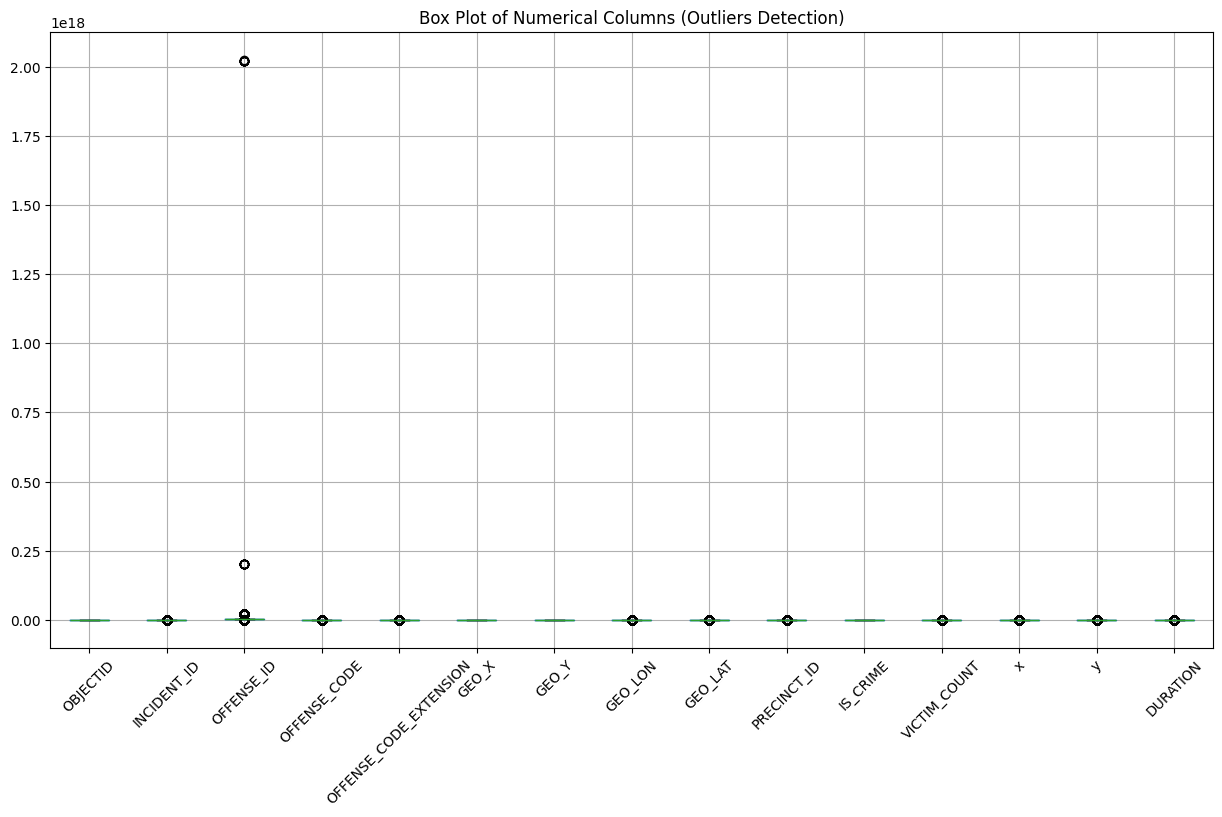

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Creating box plots
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Box Plot of Numerical Columns (Outliers Detection)")
plt.show()
